# Weakly nonlinear analysis of traveling and standing waves
(this is the definite one)

In what follows, we will study __the model__
\begin{equation}
\label{eq:csh}
\partial_t A=(\xi+i \gamma)A-(C_3+i\mu)|A|^2A-C_5 |A|^4A-(q^2+\nabla^2)^2 A+i\delta \nabla^2 A,
\end{equation}
we set
\begin{align}
A&=\epsilon a(x,\tau,t) e^{i\omega t}+\epsilon^3 z_3(x) e^{i \omega t}+\ldots\\
&= \epsilon[ v(\tau) e^{ikx}+\bar{w}(\tau)e^{-ikx}]e^{i\omega t}+\epsilon^3 z_3(x) e^{i\omega t}+\ldots
\end{align}
and
$$\omega=\omega_0+\epsilon^2 \omega_2+\ldots$$
$$\xi=\xi_0+\epsilon^2 \xi_2+\ldots$$
$$\tau=\epsilon^2 t \to \frac{d \tau}{dt}=\epsilon^2\to \partial_t=\partial_t +\epsilon^2 \partial_\tau$$
Using these expansions, we collect terms at each order

## Let's write the left and right hand side of this expression

In [1]:
from sympy import *;
[epsilon,k,x,t,omega,tau]=symbols('epsilon,k,x,t,omega,tau',real=True);
v=Function('v'); w=Function('w'); z3=Function('z3');
A=epsilon*(v(tau)*exp(I*k*x)+w(tau)*exp(-I*k*x))*exp(I*omega*t)+epsilon**3*z3(x)*exp(I*omega*t);
A

epsilon**3*z3(x)*exp(I*omega*t) + epsilon*(v(tau)*exp(I*k*x) + w(tau)*exp(-I*k*x))*exp(I*omega*t)

Hence, $A$ and its derivative $\partial_t A=\partial_t A+ \epsilon^2 \partial_\tau A$ are

In [2]:
At=diff(A,t)+epsilon**2*diff(A,tau); At

I*epsilon**3*omega*z3(x)*exp(I*omega*t) + epsilon**3*(exp(I*k*x)*Derivative(v(tau), tau) + exp(-I*k*x)*Derivative(w(tau), tau))*exp(I*omega*t) + I*epsilon*omega*(v(tau)*exp(I*k*x) + w(tau)*exp(-I*k*x))*exp(I*omega*t)

removing the factor $e^{i\omega t}$ and replacing $\xi$ and $\omega$ $\ldots$

In [3]:
[omega0,omega2]=symbols('omega0,omega2',real=True);

In [4]:
lhs=collect(expand(expand(At*exp(-I*omega*t)).subs(omega,omega0+epsilon**2*omega2)),epsilon)+O(epsilon**4); lhs

epsilon*(I*omega0*v(tau)*exp(I*k*x) + I*omega0*w(tau)*exp(-I*k*x)) + epsilon**3*(I*omega0*z3(x) + I*omega2*v(tau)*exp(I*k*x) + I*omega2*w(tau)*exp(-I*k*x) + exp(I*k*x)*Derivative(v(tau), tau) + exp(-I*k*x)*Derivative(w(tau), tau)) + O(epsilon**4)

Now for the right hand side

In [5]:
[xi,gamma,c3,mu,c5,q,delta,Delta]=symbols('xi,gamma,c3,mu,c5,q,delta,Delta',real=True); a=Symbol('a'); 
rhs=(xi+I*gamma)*a-a**2*conjugate(a)*(c3+I*mu)-c5*conjugate(a)**2*a**3-(q**2+Delta)**2*a+I*delta*Delta*a; rhs

I*Delta*a*delta - a**3*c5*conjugate(a)**2 - a**2*(c3 + I*mu)*conjugate(a) - a*(Delta + q**2)**2 + a*(I*gamma + xi)

In [6]:
[xi0,xi2]=symbols('xi0,xi2',real=True);
rhs=collect(expand(rhs.subs(a,expand(A*exp(-I*omega*t))).subs(xi,xi0+epsilon**2*xi2)),epsilon)+O(epsilon**4); rhs



epsilon*(-Delta**2*v(tau)*exp(I*k*x) - Delta**2*w(tau)*exp(-I*k*x) + I*Delta*delta*v(tau)*exp(I*k*x) + I*Delta*delta*w(tau)*exp(-I*k*x) - 2*Delta*q**2*v(tau)*exp(I*k*x) - 2*Delta*q**2*w(tau)*exp(-I*k*x) + I*gamma*v(tau)*exp(I*k*x) + I*gamma*w(tau)*exp(-I*k*x) - q**4*v(tau)*exp(I*k*x) - q**4*w(tau)*exp(-I*k*x) + xi0*v(tau)*exp(I*k*x) + xi0*w(tau)*exp(-I*k*x)) + epsilon**3*(-Delta**2*z3(x) + I*Delta*delta*z3(x) - 2*Delta*q**2*z3(x) - c3*v(tau)**2*exp(3*I*k*x)*conjugate(w(tau)) - c3*v(tau)**2*exp(I*k*x)*conjugate(v(tau)) - 2*c3*v(tau)*w(tau)*exp(I*k*x)*conjugate(w(tau)) - 2*c3*v(tau)*w(tau)*exp(-I*k*x)*conjugate(v(tau)) - c3*w(tau)**2*exp(-I*k*x)*conjugate(w(tau)) - c3*w(tau)**2*exp(-3*I*k*x)*conjugate(v(tau)) + I*gamma*z3(x) - I*mu*v(tau)**2*exp(3*I*k*x)*conjugate(w(tau)) - I*mu*v(tau)**2*exp(I*k*x)*conjugate(v(tau)) - 2*I*mu*v(tau)*w(tau)*exp(I*k*x)*conjugate(w(tau)) - 2*I*mu*v(tau)*w(tau)*exp(-I*k*x)*conjugate(v(tau)) - I*mu*w(tau)**2*exp(-I*k*x)*conjugate(w(tau)) - I*mu*w(tau)**2*exp(

## Order $O(\epsilon)$

In [7]:
lhs.coeff(epsilon,1) # 

I*omega0*v(tau)*exp(I*k*x) + I*omega0*w(tau)*exp(-I*k*x)

In [8]:
factor(rhs.coeff(epsilon,1))

-(v(tau)*exp(2*I*k*x) + w(tau))*(Delta**2 - I*Delta*delta + 2*Delta*q**2 - I*gamma + q**4 - xi0)*exp(-I*k*x)

In [9]:
eo1=factor(lhs.coeff(epsilon,1)-factor(rhs.coeff(epsilon,1))); eo1

(v(tau)*exp(2*I*k*x) + w(tau))*(Delta**2 - I*Delta*delta + 2*Delta*q**2 - I*gamma + I*omega0 + q**4 - xi0)*exp(-I*k*x)

In [10]:
oo1=simplify(eo1.subs(Delta,-k**2)/(v(tau)*exp(I*k*x)+w(tau)*exp(-I*k*x))); oo1

I*delta*k**2 - I*gamma + k**4 - 2*k**2*q**2 + I*omega0 + q**4 - xi0

In [11]:
solve(oo1,xi0,omega0)

{xi0: k**4 - 2*k**2*q**2 + q**4, omega0: -delta*k**2 + gamma}

Hence, $\xi_0=(q^2-k^2)^2,\quad \omega_0=\gamma-\delta k^2.$

## Order $O(\epsilon^3)$

In [12]:
lhs3=lhs.coeff(epsilon,3); lhs3

I*omega0*z3(x) + I*omega2*v(tau)*exp(I*k*x) + I*omega2*w(tau)*exp(-I*k*x) + exp(I*k*x)*Derivative(v(tau), tau) + exp(-I*k*x)*Derivative(w(tau), tau)

In [13]:
rhs3=factor(rhs.coeff(epsilon,3));  rhs3

-(Delta**2*z3(x)*exp(3*I*k*x) - I*Delta*delta*z3(x)*exp(3*I*k*x) + 2*Delta*q**2*z3(x)*exp(3*I*k*x) + c3*v(tau)**2*exp(6*I*k*x)*conjugate(w(tau)) + c3*v(tau)**2*exp(4*I*k*x)*conjugate(v(tau)) + 2*c3*v(tau)*w(tau)*exp(4*I*k*x)*conjugate(w(tau)) + 2*c3*v(tau)*w(tau)*exp(2*I*k*x)*conjugate(v(tau)) + c3*w(tau)**2*exp(2*I*k*x)*conjugate(w(tau)) + c3*w(tau)**2*conjugate(v(tau)) - I*gamma*z3(x)*exp(3*I*k*x) + I*mu*v(tau)**2*exp(6*I*k*x)*conjugate(w(tau)) + I*mu*v(tau)**2*exp(4*I*k*x)*conjugate(v(tau)) + 2*I*mu*v(tau)*w(tau)*exp(4*I*k*x)*conjugate(w(tau)) + 2*I*mu*v(tau)*w(tau)*exp(2*I*k*x)*conjugate(v(tau)) + I*mu*w(tau)**2*exp(2*I*k*x)*conjugate(w(tau)) + I*mu*w(tau)**2*conjugate(v(tau)) + q**4*z3(x)*exp(3*I*k*x) - xi0*z3(x)*exp(3*I*k*x) - xi2*v(tau)*exp(4*I*k*x) - xi2*w(tau)*exp(2*I*k*x))*exp(-3*I*k*x)

So, the equation at this order is

In [14]:
eqq3=collect(expand(lhs3-rhs3),exp(I*k*x)); eqq3

Delta**2*z3(x) - I*Delta*delta*z3(x) + 2*Delta*q**2*z3(x) - I*gamma*z3(x) + I*omega0*z3(x) + q**4*z3(x) - xi0*z3(x) + (c3*v(tau)**2*conjugate(w(tau)) + I*mu*v(tau)**2*conjugate(w(tau)))*exp(3*I*k*x) + (c3*w(tau)**2*conjugate(v(tau)) + I*mu*w(tau)**2*conjugate(v(tau)))*exp(-3*I*k*x) + (c3*v(tau)**2*conjugate(v(tau)) + 2*c3*v(tau)*w(tau)*conjugate(w(tau)) + I*mu*v(tau)**2*conjugate(v(tau)) + 2*I*mu*v(tau)*w(tau)*conjugate(w(tau)) + I*omega2*v(tau) - xi2*v(tau) + Derivative(v(tau), tau))*exp(I*k*x) + (2*c3*v(tau)*w(tau)*conjugate(v(tau)) + c3*w(tau)**2*conjugate(w(tau)) + 2*I*mu*v(tau)*w(tau)*conjugate(v(tau)) + I*mu*w(tau)**2*conjugate(w(tau)) + I*omega2*w(tau) - xi2*w(tau) + Derivative(w(tau), tau))*exp(-I*k*x)

In [15]:
tore=Eq(eqq3.coeff(z3(x))*z3(x),collect(expand(-eqq3+(eqq3.coeff(z3(x))*z3(x))),exp(I*k*x))); #third order eq

In [16]:
tore

Eq((Delta**2 - I*Delta*delta + 2*Delta*q**2 - I*gamma + I*omega0 + q**4 - xi0)*z3(x), (-c3*v(tau)**2*conjugate(w(tau)) - I*mu*v(tau)**2*conjugate(w(tau)))*exp(3*I*k*x) + (-c3*w(tau)**2*conjugate(v(tau)) - I*mu*w(tau)**2*conjugate(v(tau)))*exp(-3*I*k*x) + (-c3*v(tau)**2*conjugate(v(tau)) - 2*c3*v(tau)*w(tau)*conjugate(w(tau)) - I*mu*v(tau)**2*conjugate(v(tau)) - 2*I*mu*v(tau)*w(tau)*conjugate(w(tau)) - I*omega2*v(tau) + xi2*v(tau) - Derivative(v(tau), tau))*exp(I*k*x) + (-2*c3*v(tau)*w(tau)*conjugate(v(tau)) - c3*w(tau)**2*conjugate(w(tau)) - 2*I*mu*v(tau)*w(tau)*conjugate(v(tau)) - I*mu*w(tau)**2*conjugate(w(tau)) - I*omega2*w(tau) + xi2*w(tau) - Derivative(w(tau), tau))*exp(-I*k*x))

The left hand side just has the linear equation again, given by 

In [17]:
tore.lhs

(Delta**2 - I*Delta*delta + 2*Delta*q**2 - I*gamma + I*omega0 + q**4 - xi0)*z3(x)

Whose solutions is known. Using the inner product $<f|g>=\int_0 ^T \bar{f}(x) g(x) dx$, the adjoint of the linear operator is giving by

In [18]:
tore.lhs.coeff(z3(x),1).subs(I,-I)

Delta**2 + I*Delta*delta + 2*Delta*q**2 + I*gamma - I*omega0 + q**4 - xi0

Whose kernel is again $u_\pm =u_{0,\pm} e^{\pm i k x}$. Consequently, the solvability conditions are

In [19]:
amp1=Eq(diff(v(tau),tau),(collect(collect(collect(simplify(tore.rhs.coeff(exp(I*k*x)).subs(diff(v(tau),tau),0))/v(tau),I*mu),c3),-v(tau)*conjugate(v(tau))-2*w(tau)*conjugate(w(tau))))*v(tau));
amp1

Eq(Derivative(v(tau), tau), (-I*omega2 + xi2 + (c3 + I*mu)*(-v(tau)*conjugate(v(tau)) - 2*w(tau)*conjugate(w(tau))))*v(tau))

In [20]:
amp2=Eq(diff(w(tau),tau),(collect(collect(collect(simplify(tore.rhs.coeff(exp(-I*k*x)).subs(diff(w(tau),tau),0))/w(tau),I*mu),c3),-2*v(tau)*conjugate(v(tau))-w(tau)*conjugate(w(tau))))*w(tau)); amp2

Eq(Derivative(w(tau), tau), (-I*omega2 + xi2 + (c3 + I*mu)*(-2*v(tau)*conjugate(v(tau)) - w(tau)*conjugate(w(tau))))*w(tau))

Now, we replace $v(t)=x_1 e^{i \varphi_1}$ and $w(t)=x_2 e^{i \varphi_2}$

In [21]:
x1=Function('x1',real=True); varphi1=Function('varphi1',real=True);
x2=Function('x2',real=True); varphi2=Function('varphi2',real=True);

In [22]:
ve=(amp1.rhs-amp1.lhs).subs([
    (v(tau),x1(tau)*exp(varphi1(tau)*I)),
    (w(tau),x2(tau)*exp(varphi2(tau)*I))]).doit(); ve

(-I*omega2 + xi2 + (c3 + I*mu)*(-x1(tau)**2 - 2*x2(tau)**2))*x1(tau)*exp(I*varphi1(tau)) - I*x1(tau)*exp(I*varphi1(tau))*Derivative(varphi1(tau), tau) - exp(I*varphi1(tau))*Derivative(x1(tau), tau)

In [23]:
re(expand(ve*exp(-I*varphi1(tau)))).subs([
    (re(diff(x1(tau),tau)),diff(x1(tau),tau)),
    (im(diff(varphi1(tau),tau)),0)])

-c3*x1(tau)**3 - 2*c3*x1(tau)*x2(tau)**2 + xi2*x1(tau) - Derivative(x1(tau), tau)

Let's compute $z_3(x)$

In [24]:
[alpha,beta]=symbols('alpha,beta'); 
tore.lhs.subs(z3(x),alpha*exp(3*k*I*x)+beta*exp(-3*k*I*x)).subs(Delta,(3*k)**2)

(alpha*exp(3*I*k*x) + beta*exp(-3*I*k*x))*(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0)

In [25]:
nr3=collect(
    expand(
        tore.rhs.coeff(exp(I*k*x),3)*exp(3*k*I*x)+tore.rhs.coeff(exp(I*k*x),-3)*exp(-3*k*I*x)-
        tore.lhs.subs(z3(x),alpha*exp(3*k*I*x)+beta*exp(-3*k*I*x)).subs(Delta,(3*k)**2)),exp(I*k*x)); nr3

(9*I*alpha*delta*k**2 + I*alpha*gamma - 81*alpha*k**4 - 18*alpha*k**2*q**2 - I*alpha*omega0 - alpha*q**4 + alpha*xi0 - c3*v(tau)**2*conjugate(w(tau)) - I*mu*v(tau)**2*conjugate(w(tau)))*exp(3*I*k*x) + (9*I*beta*delta*k**2 + I*beta*gamma - 81*beta*k**4 - 18*beta*k**2*q**2 - I*beta*omega0 - beta*q**4 + beta*xi0 - c3*w(tau)**2*conjugate(v(tau)) - I*mu*w(tau)**2*conjugate(v(tau)))*exp(-3*I*k*x)

In [26]:
alpha1=solve(nr3.coeff(exp(I*k*x),3),alpha)[0]; alpha1

-(c3 + I*mu)*v(tau)**2*conjugate(w(tau))/(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0)

In [27]:
beta1=simplify(solve(nr3.coeff(exp(I*k*x),-3),beta)[0]); beta1

-(c3 + I*mu)*w(tau)**2*conjugate(v(tau))/(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0)

In [28]:
z31=alpha1*exp(3*k*I*x)+beta1*exp(-3*k*I*x); z31

-(c3 + I*mu)*v(tau)**2*exp(3*I*k*x)*conjugate(w(tau))/(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0) - (c3 + I*mu)*w(tau)**2*exp(-3*I*k*x)*conjugate(v(tau))/(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0)

In [42]:
As=collect(expand(epsilon*(v(tau)*exp(I*k*x)+w(tau)*exp(-I*k*x))*exp(I*omega0*t)*series(exp(x),x,0,4).subs(x,I*(epsilon**2*omega2*t))+epsilon**3*z3(x)),epsilon).subs(z3(x),z31*exp(I*omega0*t)); As+O(epsilon**4)

epsilon*(v(tau)*exp(I*k*x)*exp(I*omega0*t) + w(tau)*exp(-I*k*x)*exp(I*omega0*t)) + epsilon**3*(I*omega2*t*v(tau)*exp(I*k*x)*exp(I*omega0*t) + I*omega2*t*w(tau)*exp(-I*k*x)*exp(I*omega0*t) + (-(c3 + I*mu)*v(tau)**2*exp(3*I*k*x)*conjugate(w(tau))/(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0) - (c3 + I*mu)*w(tau)**2*exp(-3*I*k*x)*conjugate(v(tau))/(-9*I*delta*k**2 - I*gamma + 81*k**4 + 18*k**2*q**2 + I*omega0 + q**4 - xi0))*exp(I*omega0*t)) + O(epsilon**4)

Some important results

In [30]:
[omega0c,omega2t,omega2a,at,ams]=symbols('omega0c,omega2t,omega2a,at,ams',real=True);

We'll choose $\xi_2=1=\frac{(\xi-\xi_0)}{\epsilon^2}$, then 

In [31]:
omega2t=1/c3; omega2t

1/c3

In [32]:
vt=sqrt(1/c3); wt=0; # the other case is analogous

In [33]:
vs=sqrt(1/(3*c3)); ws=vs; ws

sqrt(3)*sqrt(1/c3)/3

In [34]:
n=Symbol('n',integer=True);L=Symbol('L',real=True);
Ass=(As.subs(z3(x),z31)+O(epsilon**4)).subs(omega2,omega2t).subs(omega0,gamma-delta*k**2).subs(xi0,(q**2-k**2)**2).subs(k,2*pi*n/L); Ass

epsilon*(v(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(2*I*pi*n*x/L) + w(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(-2*I*pi*n*x/L)) + epsilon**3*(-(c3 + I*mu)*v(tau)**2*exp(6*I*pi*n*x/L)*conjugate(w(tau))/(-I*gamma + q**4 + I*(gamma - 4*pi**2*delta*n**2/L**2) - (q**2 - 4*pi**2*n**2/L**2)**2 - 36*I*pi**2*delta*n**2/L**2 + 72*pi**2*n**2*q**2/L**2 + 1296*pi**4*n**4/L**4) - (c3 + I*mu)*w(tau)**2*exp(-6*I*pi*n*x/L)*conjugate(v(tau))/(-I*gamma + q**4 + I*(gamma - 4*pi**2*delta*n**2/L**2) - (q**2 - 4*pi**2*n**2/L**2)**2 - 36*I*pi**2*delta*n**2/L**2 + 72*pi**2*n**2*q**2/L**2 + 1296*pi**4*n**4/L**4) + t*v(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(2*I*pi*n*x/L)/c3 + t*w(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(-2*I*pi*n*x/L)/c3) + O(epsilon**4)

omega2

In [35]:
Ass2=Ass.subs(epsilon,sqrt(xi-xi0)).removeO().subs(xi0,(q**2-k**2)**2).subs(k,2*pi*n/L); Ass2

(xi - (q**2 - 4*pi**2*n**2/L**2)**2)**(3/2)*(-(c3 + I*mu)*v(tau)**2*exp(6*I*pi*n*x/L)*conjugate(w(tau))/(-I*gamma + q**4 + I*(gamma - 4*pi**2*delta*n**2/L**2) - (q**2 - 4*pi**2*n**2/L**2)**2 - 36*I*pi**2*delta*n**2/L**2 + 72*pi**2*n**2*q**2/L**2 + 1296*pi**4*n**4/L**4) - (c3 + I*mu)*w(tau)**2*exp(-6*I*pi*n*x/L)*conjugate(v(tau))/(-I*gamma + q**4 + I*(gamma - 4*pi**2*delta*n**2/L**2) - (q**2 - 4*pi**2*n**2/L**2)**2 - 36*I*pi**2*delta*n**2/L**2 + 72*pi**2*n**2*q**2/L**2 + 1296*pi**4*n**4/L**4) + t*v(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(2*I*pi*n*x/L)/c3 + t*w(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(-2*I*pi*n*x/L)/c3) + sqrt(xi - (q**2 - 4*pi**2*n**2/L**2)**2)*(v(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(2*I*pi*n*x/L) + w(tau)*exp(I*t*(gamma - 4*pi**2*delta*n**2/L**2))*exp(-2*I*pi*n*x/L))

In [36]:
 integrate(Ass2.subs([
     (q,1),
     (n,6),
     (L,12*pi),
     (c3,-2.5),
     (delta,1),
     (v(tau),vt),
     (w(tau),wt),
     (gamma,0),
     (xi,0.2),
     (c3,-2.5)
 ]),(x,0,12*pi))

0

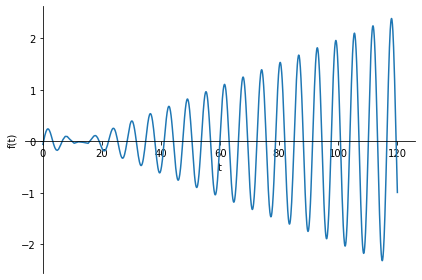

In [37]:
 plot(re(Ass2.subs([
     (q,1),
     (n,6),
     (L,12*pi),
     (c3,-2.5),
     (delta,1),
     (v(tau),vt),
     (w(tau),wt),
     (gamma,0),
     (xi,0.2),
     (x,0.2),
     (c3,-2.5)
 ])),(t,0,120))

In [38]:
im(x)

0

In [39]:
L

L